# RNN 3rd try:
Input: magnetic strength,
Output: angle, angular velocity


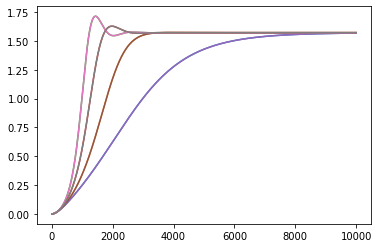

In [13]:
%clear
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.metrics import mean_squared_error


from Euler_approximation import euler #import euler approximation

[a1,a2,a3,a4]=[20,40,60,80] 
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)


plt.plot(phi1_a1)
plt.plot(phi1_a2)
plt.plot(phi1_a4)
plt.plot(phi1_a3)


In [20]:
[a1,a2,a3,a4]=[20,40,60,80] # four sets of magnetic field strength 
 # Get data sequence through Euler approximatiion
[phi1_a1,phi2_a1]=euler(a1)
[phi1_a2,phi2_a2]=euler(a2)
[phi1_a3,phi2_a3]=euler(a3)
[phi1_a4,phi2_a4]=euler(a4)

split_time =8000
T=10000
di=0.001
#Put all angle sequence together
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)

 # Calculate the angular velocity
phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di
phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)

 # Calculate the angular acceleration
phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di

input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)
input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)

series_input=np.stack((input,phi1_all,phi2_all,phi2_diff_all),axis=1)
series_input=series_input.reshape(4,split_time,4)
x_train=series_input[:,:,0].reshape(4,split_time,1)
y_train=series_input[:,:,1:3].reshape(4,split_time,2)

# print(np.shape(series))
# print(np.shape(x_train))
# print(np.shape(input_set))
# print(x_difference)
# #print(x_train)
# print(np.shape(x_difference))

In [27]:
x_train
y_train

array([[[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.56800000e-03],
        ...,
        [ 1.55536260e+00,  1.15169591e-02],
        [ 1.55537412e+00,  1.15083683e-02],
        [ 1.55538562e+00,  1.14997839e-02]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.56800000e-03],
        ...,
        [ 1.57079632e+00,  2.70805600e-08],
        [ 1.57079633e+00,  2.69433365e-08],
        [ 1.57079633e+00,  2.68065570e-08]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.56800000e-03],
        ...,
        [ 1.57079633e+00, -3.64330788e-09],
        [ 1.57079633e+00, -3.59934305e-09],
        [ 1.57079633e+00, -3.55560026e-09]],

       [[ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.56800000e-03],
        ...,
        [ 1.570796

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
# window_size = 64
# batch_size = 256

# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# input_set = windowed_dataset(input, window_size, batch_size, shuffle_buffer_size)
# print(train_set)
# print(x_train.shape)

#initializer = tf.keras.initializers.Ones()
# model = tf.keras.models.Sequential([tf.keras.layers.SimpleRNN(60, return_sequences=True, input_shape=[None, 3]),
#                                     tf.keras.layers.SimpleRNN(20, return_sequences=True),
#                                     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.SimpleRNN(60,input_shape=(None,1),return_sequences=True),  
  tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Dense(2),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# input_layer = tf.keras.layers.Input(shape=(None,1),batch_size=1)

# cell = tf.keras.layers.LSTMCell(
#     3,
#     kernel_initializer='glorot_uniform',
#     recurrent_initializer='glorot_uniform',
#     bias_initializer='zeros',
# )

# lstm = tf.keras.layers.RNN(
#     cell,
#     return_state=True,
#     return_sequences=True,
#     stateful=True
#      )

# lstm_out, hidden_state, cell_state = lstm(input_layer)

# #lstm_out, hidden_state, cell_state = tf.keras.layers.LSTM(3,return_state=True, return_sequences=True)(lstm_out)


# # output1 = tf.keras.layers.Dense(30, activation="elu")(lstm_out)
# # output = tf.keras.layers.Dense(3)(output1)

# output = lstm_out
# model = tf.keras.Model(
#     inputs=input_layer,
#     outputs=output
# )
# model = tf.keras.models.Sequential([
#        tf.keras.layers.LSTM(3, batch_input_shape=(1, 1, 3), return_sequences=True, stateful=True),
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1))                   
# ])

# model = tf.keras.models.Sequential([
#        tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,activation='relu',use_bias=False),  
# #       tf.keras.layers.SimpleRNN(2, input_shape=(1,1),return_sequences=True,use_bias=False), 
# #       tf.keras.layers.TimeDistributed(Dense(32,activation='linear',use_bias=False)),     
#        tf.keras.layers.TimeDistributed(Dense(1,activation='relu',use_bias=False,kernel_initializer=initializer))                        
# ])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
#                       input_shape=[None]),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
#   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#   tf.keras.layers.Dense(1),
#   tf.keras.layers.Lambda(lambda x: x * 100.0)
# ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))

checkpoint_cb = tf. keras.callbacks.ModelCheckpoint("my_keras_model.h5")
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<1):
        print("\n 99% acc reached")
        self.model.stop_training = True

optimizer = tf.keras.optimizers.Adam(lr=1e-4)#, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=200)#,callbacks=[CustomCallbacks()])




Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 183.7463 - mae: 184.2463
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 177.0097 - mae: 177.5097
Epoch 3/200
1/1 [==============================] - 3s 3s/step - loss: 170.2674 - mae: 170.7674
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 163.5188 - mae: 164.0188
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 156.7663 - mae: 157.2663
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 150.0140 - mae: 150.5140
Epoch 7/200
1/1 [==============================] - 3s 3s/step - loss: 143.2619 - mae: 143.7619
Epoch 8/200
1/1 [==============================] - 3s 3s/step - loss: 136.5141 - mae: 137.0141
Epoch 9/200
1/1 [==============================] - 3s 3s/step - loss: 129.7711 - mae: 130.2711
Epoch 10/200
1/1 [==============================] - 3s 3s/step - loss: 123.0351 - mae: 123.5351
Epoch 11/200
1/1 [==============================]

1/1 [==============================] - 3s 3s/step - loss: 2.4177 - mae: 2.8541
Epoch 89/200
1/1 [==============================] - 3s 3s/step - loss: 2.1343 - mae: 2.5592
Epoch 90/200
1/1 [==============================] - 3s 3s/step - loss: 2.1977 - mae: 2.6201
Epoch 91/200
1/1 [==============================] - 3s 3s/step - loss: 2.0421 - mae: 2.4600
Epoch 92/200
1/1 [==============================] - 3s 3s/step - loss: 1.9829 - mae: 2.3484
Epoch 93/200
1/1 [==============================] - 3s 3s/step - loss: 2.0154 - mae: 2.3679
Epoch 94/200
1/1 [==============================] - 3s 3s/step - loss: 1.9218 - mae: 2.3478
Epoch 95/200
1/1 [==============================] - 3s 3s/step - loss: 1.9958 - mae: 2.4653
Epoch 96/200
1/1 [==============================] - 3s 3s/step - loss: 1.8725 - mae: 2.2705
Epoch 97/200
1/1 [==============================] - 3s 3s/step - loss: 1.9411 - mae: 2.3238
Epoch 98/200
1/1 [==============================] - 3s 3s/step - loss: 1.8332 - mae: 2.2371
E

1/1 [==============================] - 3s 3s/step - loss: 0.1770 - mae: 0.4651
Epoch 177/200
1/1 [==============================] - 3s 3s/step - loss: 0.1761 - mae: 0.4604
Epoch 178/200
1/1 [==============================] - 3s 3s/step - loss: 0.1752 - mae: 0.4568
Epoch 179/200
1/1 [==============================] - 3s 3s/step - loss: 0.1744 - mae: 0.4532
Epoch 180/200
1/1 [==============================] - 3s 3s/step - loss: 0.1737 - mae: 0.4487
Epoch 181/200
1/1 [==============================] - 3s 3s/step - loss: 0.1729 - mae: 0.4455
Epoch 182/200
1/1 [==============================] - 3s 3s/step - loss: 0.1722 - mae: 0.4421
Epoch 183/200
1/1 [==============================] - 3s 3s/step - loss: 0.1715 - mae: 0.4396
Epoch 184/200
1/1 [==============================] - 3s 3s/step - loss: 0.1708 - mae: 0.4368
Epoch 185/200
1/1 [==============================] - 3s 3s/step - loss: 0.1701 - mae: 0.4360
Epoch 186/200
1/1 [==============================] - 3s 3s/step - loss: 0.1695 - mae

In [30]:
model.save('RNN3.h5') 

In [31]:
model= tf.keras.models.load_model("RNN3.h5")
optimizer = tf.keras.optimizers.Adam(lr=1e-4)#, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=200)#,callbacks=[CustomCallbacks()])

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.1585 - mae: 0.4258
Epoch 2/200
1/1 [==============================] - 3s 3s/step - loss: 5.8898 - mae: 6.3838
Epoch 3/200
1/1 [==============================] - 3s 3s/step - loss: 2.1883 - mae: 2.6863
Epoch 4/200
1/1 [==============================] - 3s 3s/step - loss: 4.1941 - mae: 4.6941
Epoch 5/200
1/1 [==============================] - 3s 3s/step - loss: 4.2180 - mae: 4.7140
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 3.9592 - mae: 4.4551
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.9563 - mae: 3.4563
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 2.1107 - mae: 2.6048
Epoch 9/200
1/1 [==============================] - 3s 3s/step - loss: 2.3752 - mae: 2.8731
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 1.1961 - mae: 1.6136
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.9871 - mae: 1.40

1/1 [==============================] - 3s 3s/step - loss: 0.1285 - mae: 0.3627
Epoch 91/200
1/1 [==============================] - 3s 3s/step - loss: 0.1280 - mae: 0.3645
Epoch 92/200
1/1 [==============================] - 3s 3s/step - loss: 0.1273 - mae: 0.3657
Epoch 93/200
1/1 [==============================] - 3s 3s/step - loss: 0.1276 - mae: 0.3690
Epoch 94/200
1/1 [==============================] - 3s 3s/step - loss: 0.1269 - mae: 0.3643
Epoch 95/200
1/1 [==============================] - 3s 3s/step - loss: 0.1267 - mae: 0.3626
Epoch 96/200
1/1 [==============================] - 3s 3s/step - loss: 0.1265 - mae: 0.3599
Epoch 97/200
1/1 [==============================] - 3s 3s/step - loss: 0.1262 - mae: 0.3592
Epoch 98/200
1/1 [==============================] - 3s 3s/step - loss: 0.1257 - mae: 0.3612
Epoch 99/200
1/1 [==============================] - 3s 3s/step - loss: 0.1259 - mae: 0.3670
Epoch 100/200
1/1 [==============================] - 3s 3s/step - loss: 0.1252 - mae: 0.3599


1/1 [==============================] - 3s 3s/step - loss: 0.1116 - mae: 0.3326
Epoch 179/200
1/1 [==============================] - 3s 3s/step - loss: 0.1114 - mae: 0.3321
Epoch 180/200
1/1 [==============================] - 3s 3s/step - loss: 0.1113 - mae: 0.3318
Epoch 181/200
1/1 [==============================] - 3s 3s/step - loss: 0.1112 - mae: 0.3317
Epoch 182/200
1/1 [==============================] - 3s 3s/step - loss: 0.1111 - mae: 0.3315
Epoch 183/200
1/1 [==============================] - 3s 3s/step - loss: 0.1110 - mae: 0.3312
Epoch 184/200
1/1 [==============================] - 3s 3s/step - loss: 0.1109 - mae: 0.3309
Epoch 185/200
1/1 [==============================] - 3s 3s/step - loss: 0.1108 - mae: 0.3306
Epoch 186/200
1/1 [==============================] - 3s 3s/step - loss: 0.1107 - mae: 0.3304
Epoch 187/200
1/1 [==============================] - 3s 3s/step - loss: 0.1106 - mae: 0.3303
Epoch 188/200
1/1 [==============================] - 3s 3s/step - loss: 0.1105 - mae

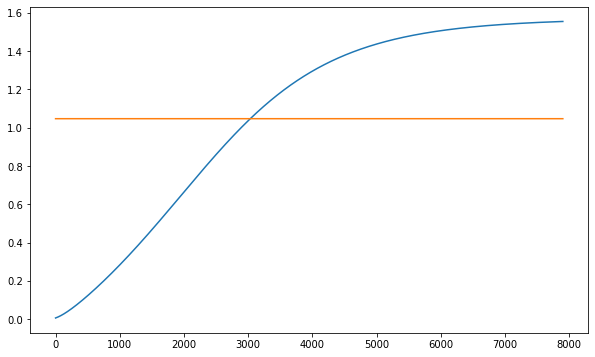

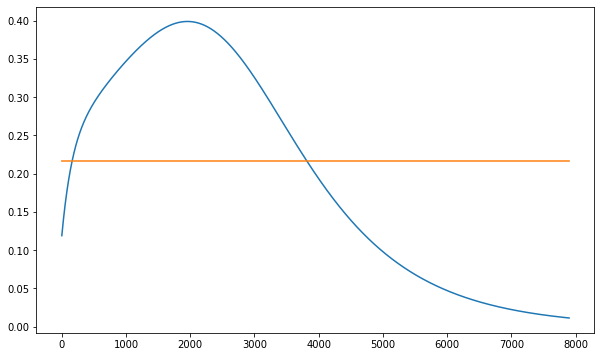

In [28]:
Predict=model.predict(x_train)

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

plt.figure(figsize=(10, 6))
plt.plot(y_train[0,100:,0])
plt.plot(Predict[0,100:,0])

plt.figure(figsize=(10, 6))
plt.plot(y_train[0,100:,1])
plt.plot(Predict[0,100:,1])




#rnn_forecast= model_forecast(model, 30, window_size) X-0-80  Y 80-100 sequence to s   s to p  y 81



In [ ]:
RNN_MSE_phi1_a1=mean_squared_error(x_train[0,:,0], Predict[0,:,0])
print(a1)
print(RNN_MSE_phi1_a1)


RNN_MSE_phi1_a2=mean_squared_error(x_train[1,:,0], Predict[1,:,0])
print(a2)
print(RNN_MSE_phi1_a2)


RNN_MSE_phi1_a3=mean_squared_error(x_train[2,:,0], Predict[2,:,0])
print(a3)
print(RNN_MSE_phi1_a3)


RNN_MSE_phi1_a4=mean_squared_error(x_train[3,:,0], Predict[3,:,0])
print(a4)
print(RNN_MSE_phi1_a4)




Test one input.  

In [ ]:
# a_test=53
# [phi1_test,phi2_test,sphi1_test,sphi2_test]=function(a_test)
# sphi1_test=sphi1_test/sampling_time

# input_test=a_test*np.ones(split_time)
# input_test=input_test[:split_time:interval]
# input_test=input_test.reshape(1,length,1)
# x_test= sphi1_test[:split_time:interval]

# trainPredict_test=model.predict(input_test)
# trainPredict_test=trainPredict_test.reshape(length)



# Predict_test=(x_test+trainPredict_test)*sampling_time
# #x_difference= x_difference.reshape(length,2)
# # plt.figure(figsize=(10, 6))
# # plot_series(range(length), x_difference[:,0])
# # plot_series(range(length), np.array(trainPredict[:,0]))

# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_test)
# plot_series(range(length), np.array(Predict_test))

**Test** four inputs a=10,30,50,70

In [ ]:
# #test four input a=10, 30, 50, 70. 
# [a1_test,a2_test,a3_test,a4_test]=[10,30,50,70]
# [phi1_a1_test,phi2_a1_test,sphi1_a1_test,sphi2_a1_test]=function(a1_test)
# [phi1_a2_test,phi2_a2_test,sphi1_a2_test,sphi2_a2_test]=function(a2_test)
# [phi1_a3_test,phi2_a3_test,sphi1_a3_test,sphi2_a3_test]=function(a3_test)
# [phi1_a4_test,phi2_a4_test,sphi1_a4_test,sphi2_a4_test]=function(a4_test)

# sphi1_all_test=np.concatenate((sphi1_a1_test,sphi1_a2_test,sphi1_a3_test,sphi1_a4_test),axis=0)
# sphi1_all_test=sphi1_all_test/sampling_time


# input_a1_test=a1_test*np.ones(T)
# input_a2_test=a2_test*np.ones(T)
# input_a3_test=a3_test*np.ones(T)
# input_a4_test=a4_test*np.ones(T)

# input_test=np.concatenate((input_a1_test,input_a2_test,input_a3_test,input_a4_test),axis=0)
# input_test=input_test.reshape(4,T,1)
# input_test=input_test[:,:split_time:interval]

# series_angle_test=sphi1_all_test.reshape(4,T,1)

# x_test =series_angle_test[:,:split_time:interval]

# testPredict = model.predict(input_test)
# testPredict=(x_test+testPredict)*sampling_time
# plt.figure(figsize=(10, 6))
# plt.title('a1_test')
# plot_series(range(length), x_test[0,:,0])
# plot_series(range(length), np.array(testPredict[0,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a2_test')
# plot_series(range(length), x_test[1,:,0])
# plot_series(range(length), np.array(testPredict[1,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a3_test')
# plot_series(range(length), x_test[2,:,0])
# plot_series(range(length), np.array(testPredict[2,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a4_test')
# plot_series(range(length), x_test[3,:,0])
# plot_series(range(length), np.array(testPredict[3,:,0]))


In [ ]:
# DENSE_MSE_phi1_a1_test=mean_squared_error(x_test[0,:,0], testPredict[0,:,0])
# print(a1_test)
# print(DENSE_MSE_phi1_a1_test)


# DENSE_MSE_phi1_a2_test=mean_squared_error(x_test[1,:,0], testPredict[1,:,0])
# print(a2_test)
# print(DENSE_MSE_phi1_a2_test)


# DENSE_MSE_phi1_a3_test=mean_squared_error(x_test[2,:,0], testPredict[2,:,0])
# print(a3_test)
# print(DENSE_MSE_phi1_a3_test)


# DENSE_MSE_phi1_a4_test=mean_squared_error(x_test[3,:,0], testPredict[3,:,0])
# print(a4_test)
# print(DENSE_MSE_phi1_a4_test)
